In [ ]:
import psycopg2

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
# %matplotlib inline     
sns.set(color_codes=True)


In [ ]:
conn = psycopg2.connect(
   host = "localhost",
database = "mtcars",
user = "postgres",
password = "0000" 
)

In [ ]:
query = "SELECT * FROM car_price_prediction;"
df = pd.read_sql_query(query, conn)
print(df)

In [5]:
df.dtypes # Используется для получения типов данных каждой колонки в DataFrame

id                    int64
price                 int64
levy                 object
manufacturer         object
model                object
Prod. year            int64
category             object
Leather interior     object
Fuel type            object
Engine volume        object
mileage              object
cylinders           float64
Gear box type        object
Drive wheels         object
doors                object
wheel                object
color                object
airbags               int64
dtype: object

In [ ]:
df = df.rename(columns={"price": "pr", "category": "cat" }) # Используется метод rename() для переименования колонок в DataFrame df.
df.head(5)


In [ ]:
df.shape # Используется для получения размерности DataFrame df.

In [ ]:
duplicate_rows_df = df[df.duplicated()] # Используется метод duplicated() для поиска дублирующихся строк в DataFrame df.
print("number of duplicate rows: ", duplicate_rows_df.shape)

In [ ]:
df.count() # Используется метод count() для подсчета количества непустых значений в каждой колонке DataFrame df.

In [ ]:
df = df.drop_duplicates() # Используется метод drop_duplicates() для удаления полностью идентичных строк-дубликатов из DataFrame df.
df.head(5)

In [ ]:
print(df.isnull().sum()) # Используется метод isnull() для создания булевого DataFrame, где True обозначает пропущенные значения (NaN),

In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

In [ ]:
sns.boxplot(x=df['pr']) # Используется библиотека seaborn для создания ящиковой диаграммы (boxplot) для колонки 'pr' в DataFrame df.

In [ ]:
sns.boxplot(x=df['airbags']) # Используется библиотека seaborn для создания ящиковой диаграммы (boxplot) для колонки 'airbags' в DataFrame df.

In [ ]:
sns.boxplot(x=df['doors']) # Используется библиотека seaborn для создания ящиковой диаграммы (boxplot) для колонки 'doors' в DataFrame df.

In [ ]:
Q1 = df.quantile(0.25) # Используется метод quantile() для вычисления квартилей Q1 (25%) и Q3 (75%) для каждой колонки DataFrame df.
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
df.manufacturer.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5)) # Используется метод value_counts() для подсчета уникальных значений в колонке 'manufacturer',
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

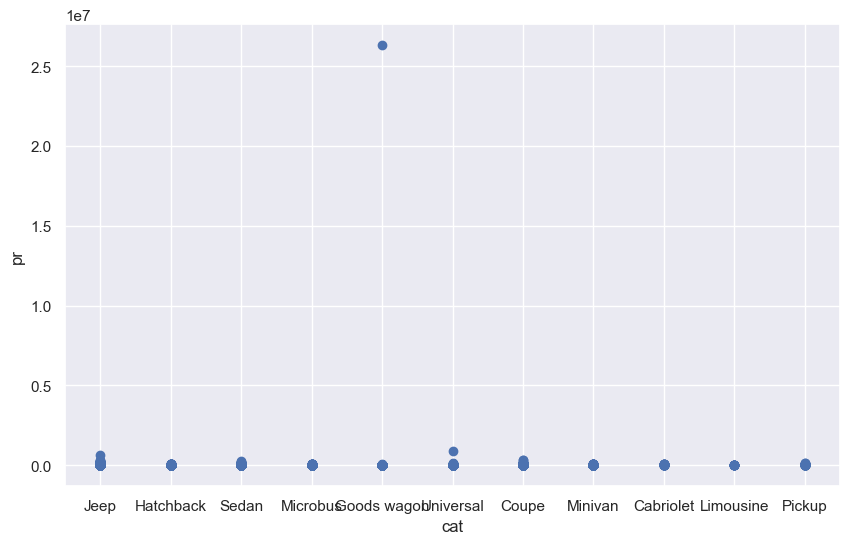

In [18]:
fig, ax = plt.subplots(figsize=(10,6)) # Создается точечный график (scatter plot) для колонок 'cat' и 'pr' в DataFrame df.
# Добавляются подписи к осям и заголовок графика.
ax.scatter(df['cat'], df['pr']) 
ax.set_xlabel('cat')# Название оси X
ax.set_ylabel('pr') # Название оси Y
# Отображается график.
plt.show()